<a href="https://colab.research.google.com/github/Jaideepgarlyal15/SentimentAnalysis-of-the-Text-based-dataset/blob/main/updated_of_SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', 2000)
#!pip install transformers
from transformers import pipeline
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

In [ ]:
sns.set()

In [ ]:
classifier = pipeline('sentiment-analysis', model='distilbert-base-uncased')

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.bias', 'classifier

**Helper Functions**

In [ ]:
def sentiment_analysis(data):
    polarity=[] # list which will contain the polarity of the comments
    sentiment=[] # list which will contain the subjectivity of the comments
    for i in data['Log_contents'].values:
        try:
            polarity.append(classifier(i)[0]['score'])
            sentiment.append(classifier(i)[0]['label'])

        except:
            polarity.append(0)
            sentiment.append(0)
    data['polarity']=polarity
    data['sentiment']=sentiment
    print("Sentiment split :",data.sentiment.value_counts())
    data.head()
    return data

**Sentiment Analysis on HealtApp Logs using BERT(distilbert)**

In [ ]:
!unzip -o '/content/drive/MyDrive/Colab Notebooks/HealthApp.log.zip'

Archive:  /content/drive/MyDrive/Colab Notebooks/HealthApp.log.zip
  inflating: HealthApp.log           
  inflating: __MACOSX/._HealthApp.log  


In [ ]:
data = pd.read_csv('/content/HealthApp.log', sep = '|', header= None, on_bad_lines='skip')
data.rename(columns={ 0: 'timestamp', 1: 'step', 2: 'user_id', 3: 'Log_contents'}, inplace = True)
df = sentiment_analysis(data.sample(1000))
df.head()




Sentiment split : NEGATIVE    974
POSITIVE     26
Name: sentiment, dtype: int64


,timestamp,step,user_id,Log_contents,polarity,sentiment
178496,20171231-10:0:26:421,Step_ExtSDM,30002312,calculateCaloriesWithCache totalCalories=135625,0.940625,NEGATIVE
202156,201811-18:29:30:182,Step_StandReportReceiver,30002312,REPORT : 1824 1302 39070 0,0.734763,NEGATIVE
115240,20171228-20:5:30:378,HiH_DataStatManager,30002312,"new date =20171228, type=40041,4020.0,old=3900.0",0.986024,NEGATIVE
123030,20171229-12:27:19:980,Step_SPUtils,30002312,setTodayTotalDetailSteps=1514521560000##1495##1235128##83501##100712##293444936,0.972707,NEGATIVE
1930,20171224-0:14:0:160,Step_LSC,30002312,processHandleBroadcastAction action:android.intent.action.TIME_TICK,0.992627,NEGATIVE


In [ ]:
data = pd.read_csv('/content/HealthApp.log', sep = '|', header= None, on_bad_lines='skip')
data.rename(columns={ 0: 'timestamp', 1: 'step', 2: 'user_id', 3: 'action'}, inplace = True)
data.head()


,timestamp,step,user_id,action
0,20171223-22:15:29:606,Step_LSC,30002312,onStandStepChanged 3579
1,20171223-22:15:29:615,Step_LSC,30002312,onExtend:1514038530000 14 0 4
2,20171223-22:15:29:633,Step_StandReportReceiver,30002312,onReceive action: android.intent.action.SCREEN_ON
3,20171223-22:15:29:635,Step_LSC,30002312,processHandleBroadcastAction action:android.intent.action.SCREEN_ON
4,20171223-22:15:29:635,Step_StandStepCounter,30002312,flush sensor data


In [ ]:
df.head()

,timestamp,step,user_id,Log_contents,polarity,sentiment
178496,20171231-10:0:26:421,Step_ExtSDM,30002312,calculateCaloriesWithCache totalCalories=135625,0.940625,NEGATIVE
202156,201811-18:29:30:182,Step_StandReportReceiver,30002312,REPORT : 1824 1302 39070 0,0.734763,NEGATIVE
115240,20171228-20:5:30:378,HiH_DataStatManager,30002312,"new date =20171228, type=40041,4020.0,old=3900.0",0.986024,NEGATIVE
123030,20171229-12:27:19:980,Step_SPUtils,30002312,setTodayTotalDetailSteps=1514521560000##1495##1235128##83501##100712##293444936,0.972707,NEGATIVE
1930,20171224-0:14:0:160,Step_LSC,30002312,processHandleBroadcastAction action:android.intent.action.TIME_TICK,0.992627,NEGATIVE


In [ ]:
data.drop('user_id', axis=1, inplace=True)

In [ ]:
df.columns
data.columns

Index(['timestamp', 'step', 'action'], dtype='object')

In [ ]:
df['user_id'].unique()

array([30002312])

In [ ]:
df.head()

,timestamp,step,user_id,Log_contents,polarity,sentiment
178496,20171231-10:0:26:421,Step_ExtSDM,30002312,calculateCaloriesWithCache totalCalories=135625,0.940625,NEGATIVE
202156,201811-18:29:30:182,Step_StandReportReceiver,30002312,REPORT : 1824 1302 39070 0,0.734763,NEGATIVE
115240,20171228-20:5:30:378,HiH_DataStatManager,30002312,"new date =20171228, type=40041,4020.0,old=3900.0",0.986024,NEGATIVE
123030,20171229-12:27:19:980,Step_SPUtils,30002312,setTodayTotalDetailSteps=1514521560000##1495##1235128##83501##100712##293444936,0.972707,NEGATIVE
1930,20171224-0:14:0:160,Step_LSC,30002312,processHandleBroadcastAction action:android.intent.action.TIME_TICK,0.992627,NEGATIVE


In [ ]:
df.plot 


#The Graph of the comparision of number of steps and Timestamps.
The code provided filters the DataFrame df based on the log contents that contain the string "onStandStepChanged". It then selects the 'timestamp' and 'Log_contents' columns for further analysis.

Next, the code extracts the number of steps from the 'Log_contents' column by splitting the string and selecting the last element. This assumes that the number of steps is present at the end of the 'Log_contents' string.

The 'timestamp' column is then converted to datetime format, allowing for easier handling and plotting of the timestamps.

By performing these operations, the code prepares the data for further analysis or visualization, enabling a comparison between the number of steps and their respective timestamps. This can help identify any patterns, trends, or relationships between the number of steps recorded and the corresponding timestamps.

In [ ]:
step_data=df[df['Log_contents'].str.contains("onStandStepChanged")].loc[:,['timestamp','Log_contents']]

In [ ]:
step_data['Log_contents'] = step_data['Log_contents'].map(lambda x: x.split('onStandStepChanged')[1].split(',')[0]).astype(int)
step_data['timestamp'] = pd.to_datetime(step_data['timestamp'], format="%Y%m%d-%H:%M:%S:%f")
step_data.set_index('timestamp', inplace=True)

In [ ]:
step_data.to_csv('adarsh')

<Axes: xlabel='timestamp'>

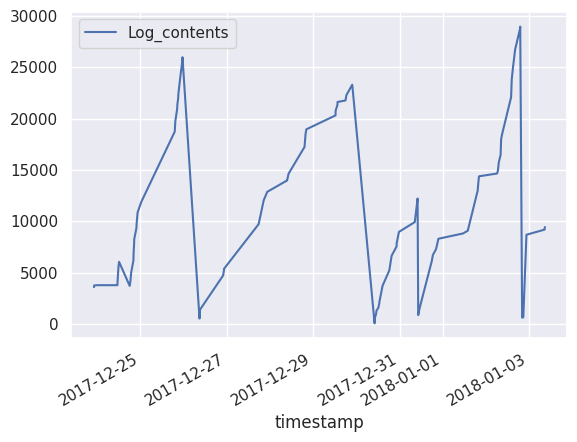

In [ ]:
step_data.plot()

# This show the comparision between the total calories and the timestamps
The code provided filters the DataFrame df based on the log contents that contain the string "totalCalories". It then selects the 'timestamp' and 'Log_contents' columns for further analysis.

The assumption here is that the log contains information about total calories, and we are interested in comparing the total calories recorded at different timestamps.

Once the data is filtered and the desired columns are selected, the code prepares the data for visualization by plotting the total calories against the timestamps.

The resulting graph allows for a visual comparison between the total calories recorded and their corresponding timestamps. This can help identify patterns, trends, or relationships between calorie consumption and the timestamps at which they were recorded.

In [ ]:
calorie_data=df[df['Log_contents'].str.contains("totalCalories")].loc[:,['timestamp','Log_contents']]

In [ ]:
calorie_data['Log_contents'] = calorie_data['Log_contents'].map(lambda x: x.split('totalCalories=')[1]).astype(int)
calorie_data['timestamp'] = pd.to_datetime(calorie_data['timestamp'], format="%Y%m%d-%H:%M:%S:%f")
calorie_data.set_index('timestamp', inplace=True)

<Axes: xlabel='timestamp'>

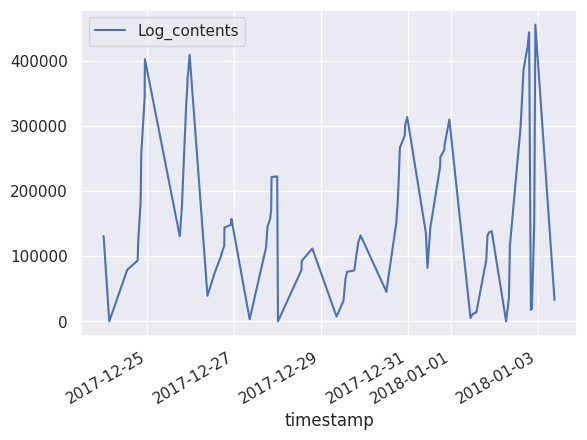

In [ ]:
calorie_data.plot()

In [ ]:
data.filter 

<bound method NDFrame.filter of                     timestamp                      step  \
0       20171223-22:15:29:606                  Step_LSC   
1       20171223-22:15:29:615                  Step_LSC   
2       20171223-22:15:29:633  Step_StandReportReceiver   
3       20171223-22:15:29:635                  Step_LSC   
4       20171223-22:15:29:635     Step_StandStepCounter   
...                       ...                       ...   
253370      201813-9:56:6:942               Step_ExtSDM   
253371      201813-9:56:6:949               Step_ExtSDM   
253372      201813-9:57:0:118                  Step_LSC   
253373      201813-9:58:0:181                  Step_LSC   
253374       201813-9:59:0:95                  Step_LSC   

                                                                     action  
0                                                   onStandStepChanged 3579  
1                                             onExtend:1514038530000 14 0 4  
2                        

In [ ]:
step_data=df[df['Log_contents'].str.contains("")].loc[:,['timestamp','Log_contents']]

In [ ]:
df.to_csv('health.csv')

(array([974.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  26.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

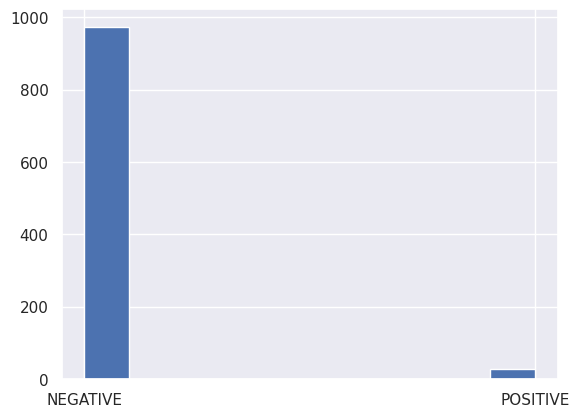

In [ ]:
plt.hist(df['sentiment'])

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


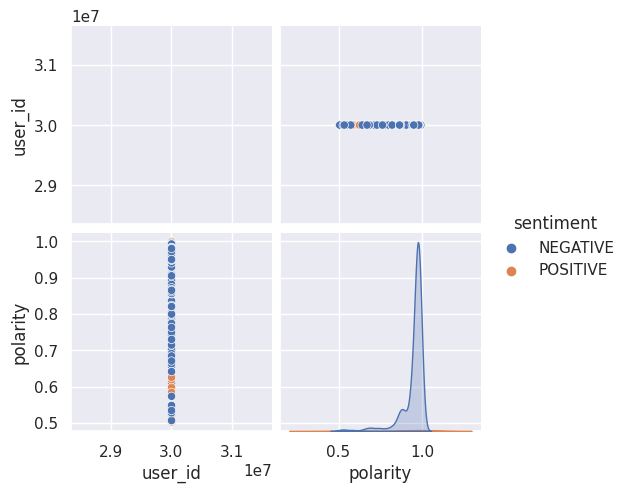

In [ ]:
sns.pairplot(df, hue='sentiment', size=2.5);

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 178496 to 196119
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     1000 non-null   object 
 1   step          1000 non-null   object 
 2   user_id       1000 non-null   int64  
 3   Log_contents  1000 non-null   object 
 4   polarity      1000 non-null   float64
 5   sentiment     1000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 54.7+ KB


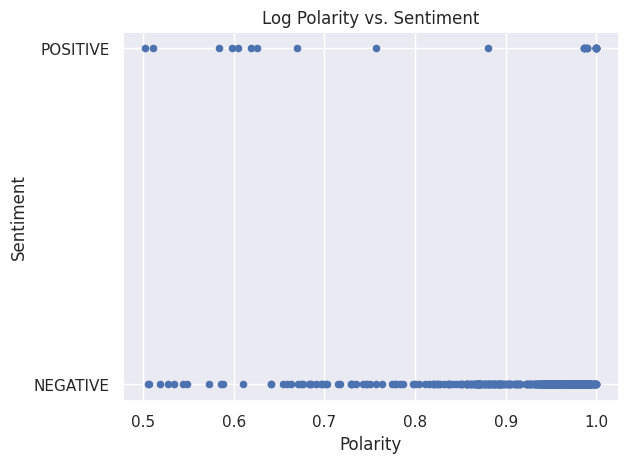

In [ ]:
# Create a scatter plot of polarity and sentiment
df.plot.scatter(x='polarity', y='sentiment')
plt.xlabel('Polarity')
plt.ylabel('Sentiment')
plt.title('Log Polarity vs. Sentiment')
plt.show()

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y%m%d-%H:%M:%S:%f')

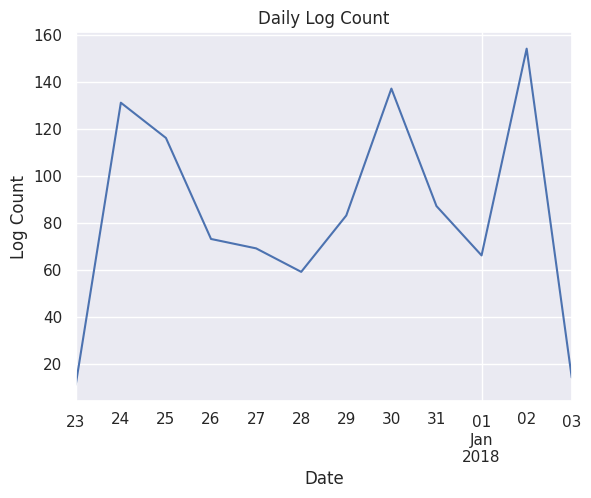

In [ ]:
log_count = df.groupby(pd.Grouper(key='timestamp', freq='D')).size()
log_count.plot()
plt.xlabel('Date')
plt.ylabel('Log Count')
plt.title('Daily Log Count')
plt.show()

In [ ]:
df.head()


,timestamp,step,user_id,Log_contents,polarity,sentiment
178496,2017-12-31 10:00:26.421,Step_ExtSDM,30002312,calculateCaloriesWithCache totalCalories=135625,0.940625,NEGATIVE
202156,2018-01-01 18:29:30.182,Step_StandReportReceiver,30002312,REPORT : 1824 1302 39070 0,0.734763,NEGATIVE
115240,2017-12-28 20:05:30.378,HiH_DataStatManager,30002312,"new date =20171228, type=40041,4020.0,old=3900.0",0.986024,NEGATIVE
123030,2017-12-29 12:27:19.980,Step_SPUtils,30002312,setTodayTotalDetailSteps=1514521560000##1495##1235128##83501##100712##293444936,0.972707,NEGATIVE
1930,2017-12-24 00:14:00.160,Step_LSC,30002312,processHandleBroadcastAction action:android.intent.action.TIME_TICK,0.992627,NEGATIVE


In [ ]:
user_steps = df.groupby('user_id')['Log_contents'].sum().reset_index()

In [ ]:
print(user_steps)

    user_id  \
0  30002312   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

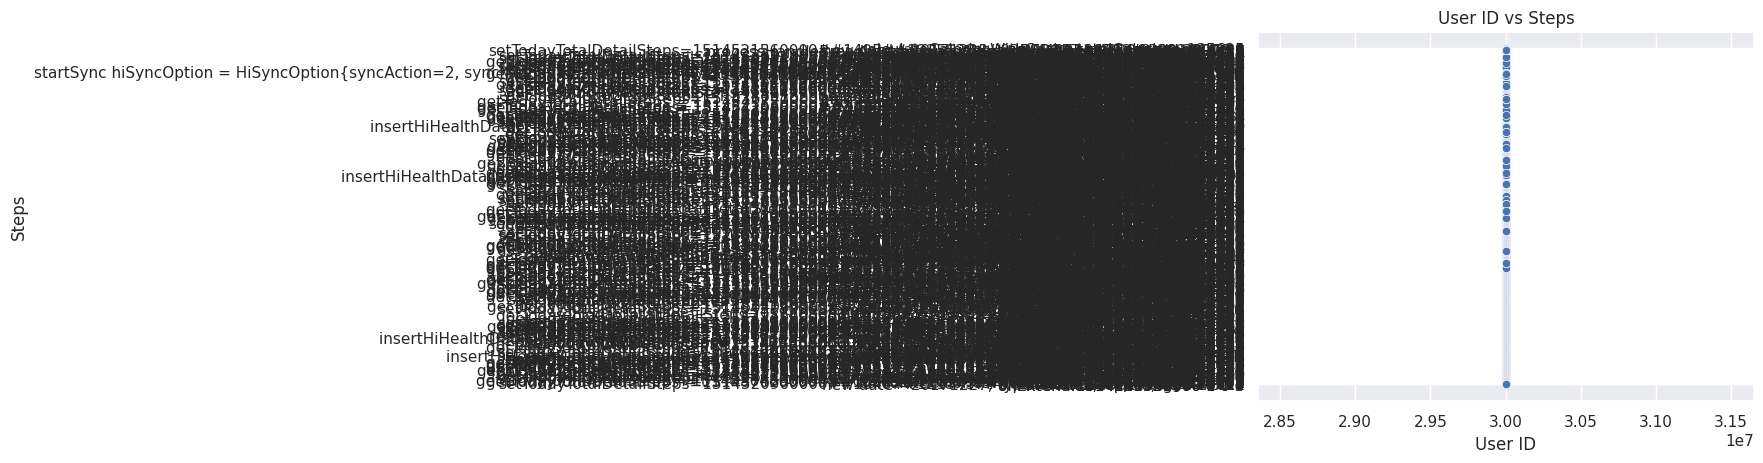

In [ ]:
sns.scatterplot(x='user_id', y='Log_contents', data=df)
plt.title('User ID vs Steps')
plt.xlabel('User ID')
plt.ylabel('Steps')
plt.show()


**Tableau Presentation**
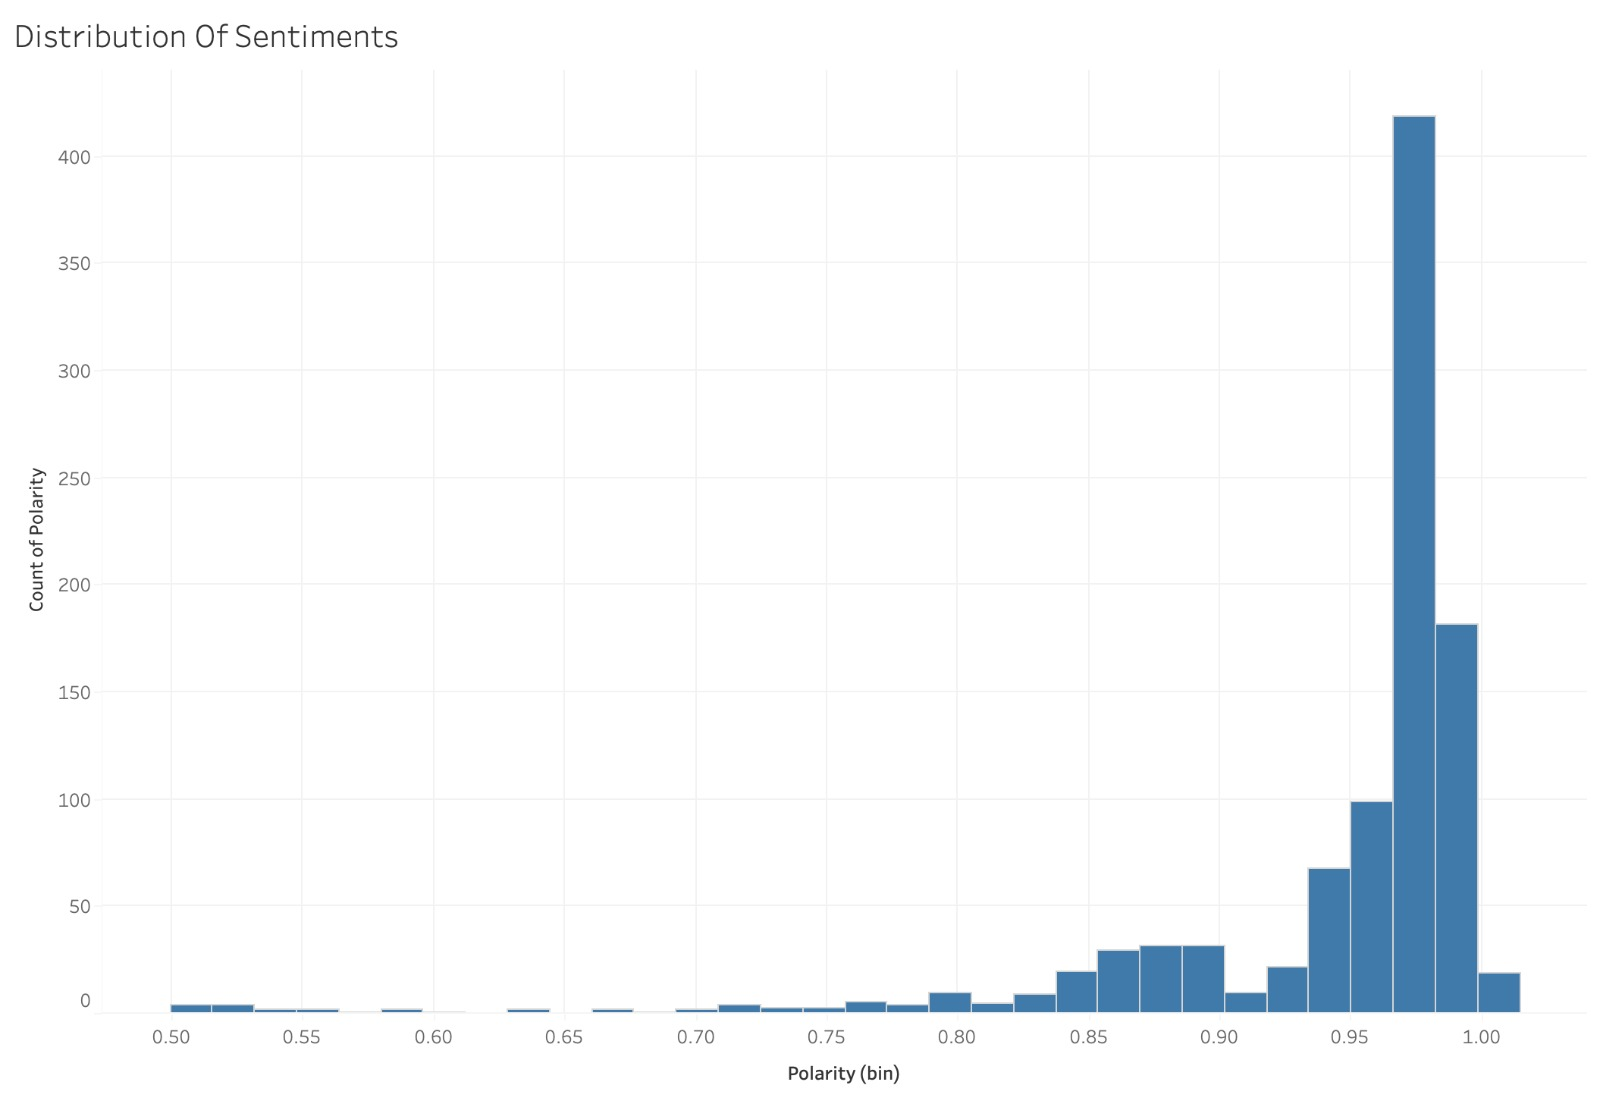


Hence we have constructed the Analysis with the Tableau for the better understanding of the dataset, since the data was in Text format and there was no classification in the dataset, so Cleaned all the values and notationed all the important labels and hence we got this these classification of **negative and positive** *(Polarity)*.

